In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

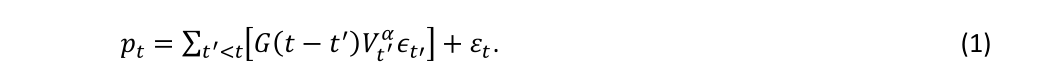

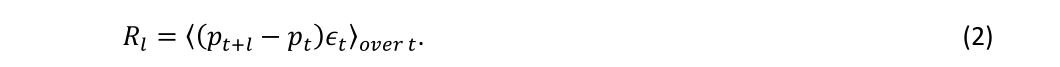

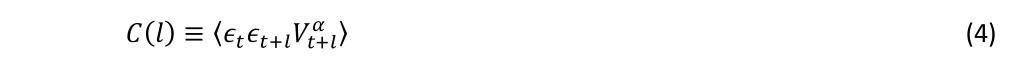

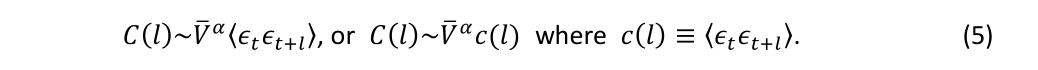

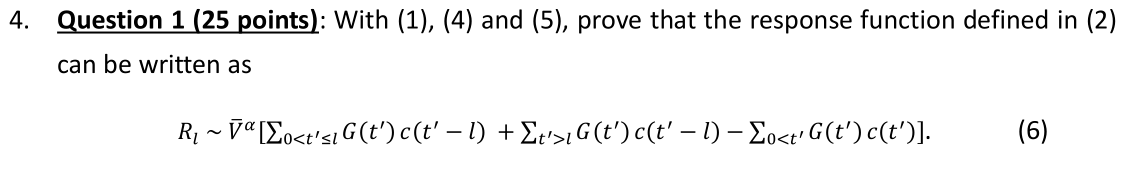

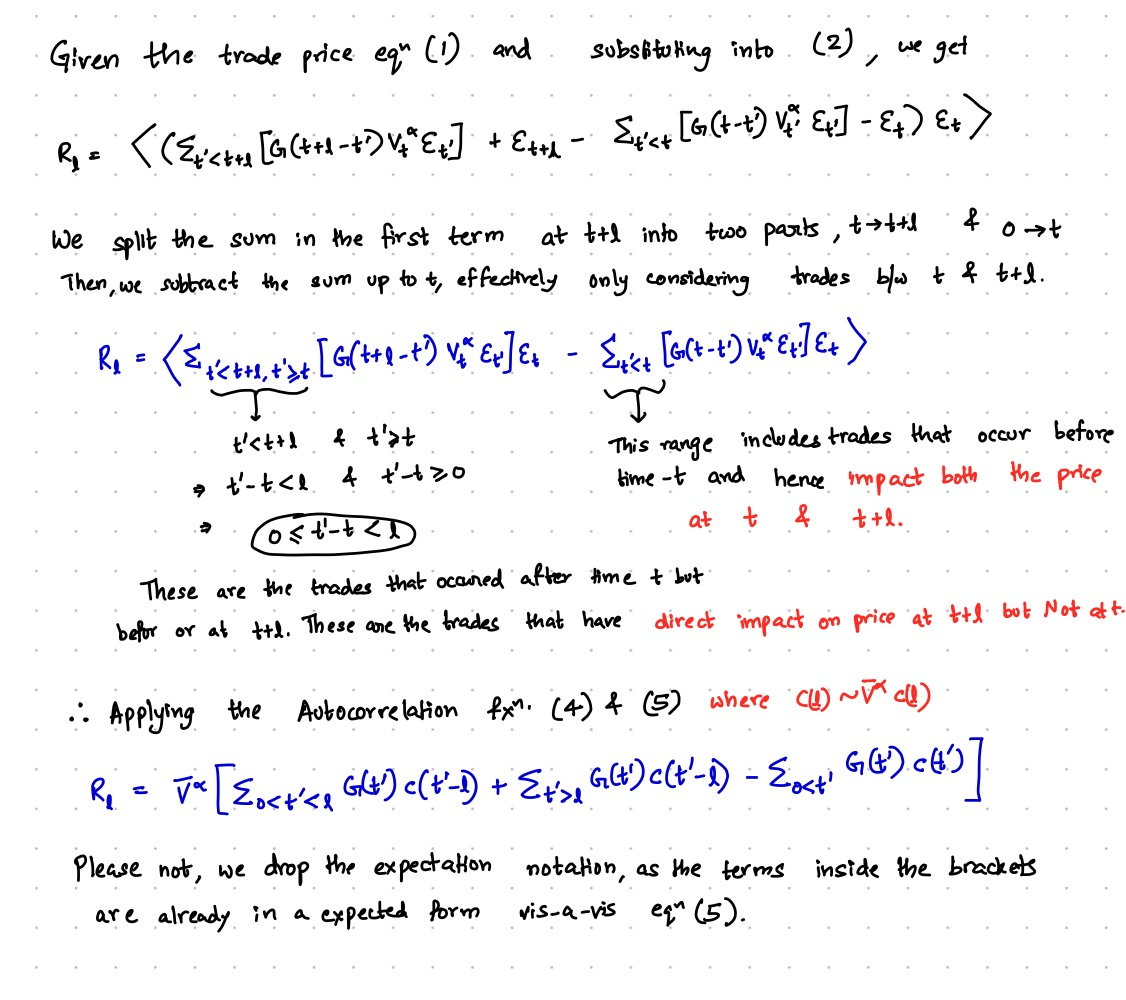

---

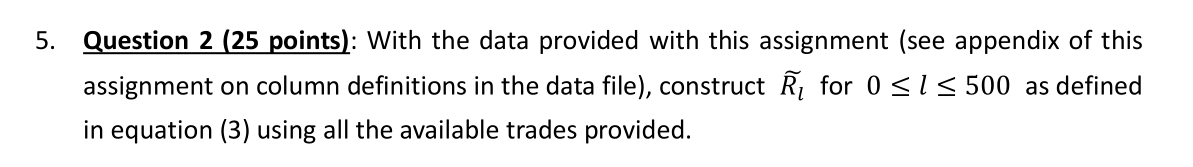

In [8]:
df1 = pd.read_csv('pp1_md_201607_201607.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)

df2 = pd.read_csv('pp1_md_201608_201608.csv')
df2.drop("Unnamed: 0", axis=1, inplace=True)


In [9]:
df1

,Date,Time,Size,VWAP,Sign,midQ,BP1,SP1
0,20160701,90100020,48.0,5267.916667,-1.0,5268.0,5266.0,5270.0
1,20160701,90100270,42.0,5266.571429,-1.0,5268.0,5266.0,5270.0
2,20160701,90100518,72.0,5268.444444,1.0,5267.0,5266.0,5268.0
3,20160701,90100762,326.0,5270.000000,1.0,5268.0,5266.0,5270.0
4,20160701,90101019,6.0,5268.666667,-1.0,5270.0,5268.0,5272.0
...,...,...,...,...,...,...,...,...
397872,20160729,145858666,44.0,4996.000000,1.0,4995.0,4994.0,4996.0
397873,20160729,145858902,56.0,4996.000000,1.0,4995.0,4994.0,4996.0
397874,20160729,145859425,6.0,4995.333333,1.0,4995.0,4994.0,4996.0
397875,20160729,145859636,4.0,4996.000000,1.0,4995.0,4994.0,4996.0


In [10]:
df2

,Date,Time,Size,VWAP,Sign,midQ,BP1,SP1
0,20160801,90100221,10.0,5084.000000,-1.0,5085.0,5084.0,5086.0
1,20160801,90100407,20.0,5086.000000,1.0,5085.0,5084.0,5086.0
2,20160801,90100745,16.0,5086.000000,1.0,5085.0,5084.0,5086.0
3,20160801,90100962,12.0,5085.666667,1.0,5085.0,5084.0,5086.0
4,20160801,90101246,28.0,5085.571429,1.0,5085.0,5084.0,5086.0
...,...,...,...,...,...,...,...,...
506306,20160831,145858815,44.0,5346.000000,-1.0,5347.0,5346.0,5348.0
506307,20160831,145859065,38.0,5347.263158,1.0,5347.0,5346.0,5348.0
506308,20160831,145859324,4.0,5346.000000,-1.0,5347.0,5346.0,5348.0
506309,20160831,145859572,4.0,5347.000000,0.0,5347.0,5346.0,5348.0


In [11]:
#Concatenate the dataframes
df = pd.concat([df1, df2], ignore_index=True)
df

,Date,Time,Size,VWAP,Sign,midQ,BP1,SP1
0,20160701,90100020,48.0,5267.916667,-1.0,5268.0,5266.0,5270.0
1,20160701,90100270,42.0,5266.571429,-1.0,5268.0,5266.0,5270.0
2,20160701,90100518,72.0,5268.444444,1.0,5267.0,5266.0,5268.0
3,20160701,90100762,326.0,5270.000000,1.0,5268.0,5266.0,5270.0
4,20160701,90101019,6.0,5268.666667,-1.0,5270.0,5268.0,5272.0
...,...,...,...,...,...,...,...,...
904183,20160831,145858815,44.0,5346.000000,-1.0,5347.0,5346.0,5348.0
904184,20160831,145859065,38.0,5347.263158,1.0,5347.0,5346.0,5348.0
904185,20160831,145859324,4.0,5346.000000,-1.0,5347.0,5346.0,5348.0
904186,20160831,145859572,4.0,5347.000000,0.0,5347.0,5346.0,5348.0


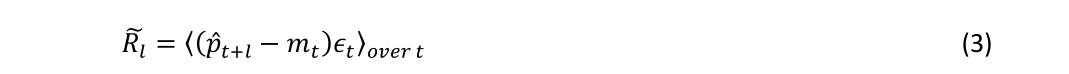

In [24]:
# Function to calculate Rl_tilde for a given lag l
def calculate_Rl_tilde(df, l):
    vwap_t_l = df['VWAP'].shift(-l)   # Shift VWAP backwards by l
    mt = df['midQ']                   # mid-quote at time t
    epsilon_t = df['Sign']            # sign at time t

    Rl_tilde_values = (vwap_t_l - mt) * epsilon_t
    Rl_tilde_values.dropna(inplace=True)  # Drop NaN values resulting from the shift operation

    # Divide by the bid-ask spread (assuming bid and ask prices are available)
    bid_ask_spread = df['SP1'] - df['BP1']
    Rl_tilde_values /= bid_ask_spread

    return Rl_tilde_values.mean()

# Calculate Rl_tilde for 0 <= l <= 500
Rl_tilde_results = [calculate_Rl_tilde(df, l) for l in range(501)]
Rl_tilde_results

[0.45905368847382466,
 0.18321797564642547,
 0.18779777645341003,
 0.1944130755838694,
 0.19916333415297982,
 0.20221751592849224,
 0.20592058447937137,
 0.20761135839840048,
 0.20998503834816912,
 0.21199500031457494,
 0.212979188926931,
 0.213674865990605,
 0.2142056286494998,
 0.21503092223409012,
 0.21570706533534986,
 0.21563764826744494,
 0.21614310323071925,
 0.21593669732256948,
 0.21671344383320837,
 0.21681168524453728,
 0.21743760795230402,
 0.21785519243235096,
 0.21820162244697536,
 0.2176353065419987,
 0.21826919848945806,
 0.21764382868424384,
 0.2182839699454374,
 0.21747480400161695,
 0.21826266551998164,
 0.21778742836573978,
 0.2174977174970967,
 0.21797272787387786,
 0.2178733717461222,
 0.21783246180613064,
 0.21702862273813586,
 0.21715105786541214,
 0.21706819503431105,
 0.21697479411366266,
 0.21730629481210337,
 0.2165775257312885,
 0.21604421575795596,
 0.21541666962169784,
 0.21436871406235805,
 0.21428518816261335,
 0.21430269515987366,
 0.21487898036881042,

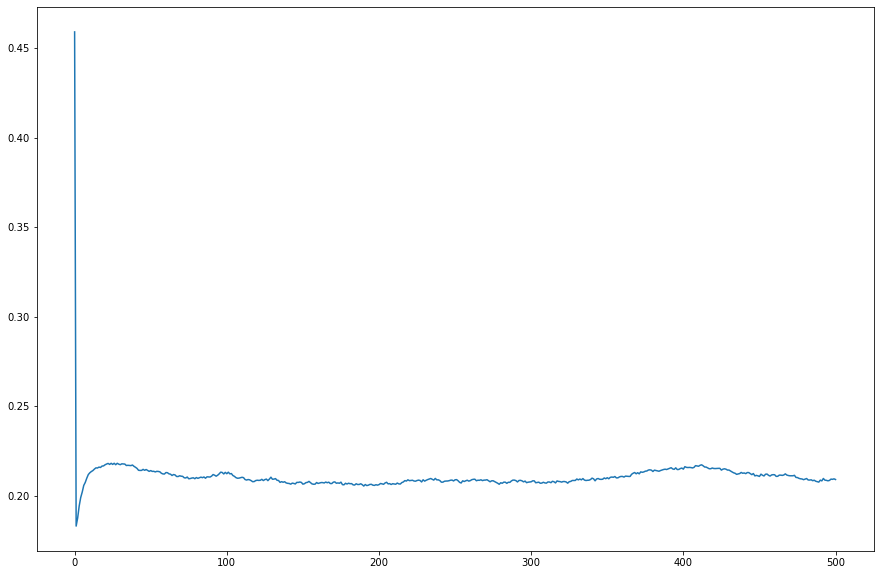

In [30]:
#PLot Rl_tilde_results against l and change the figure size
plt.figure(figsize=(15,10))
plt.plot(Rl_tilde_results)
plt.show()

---

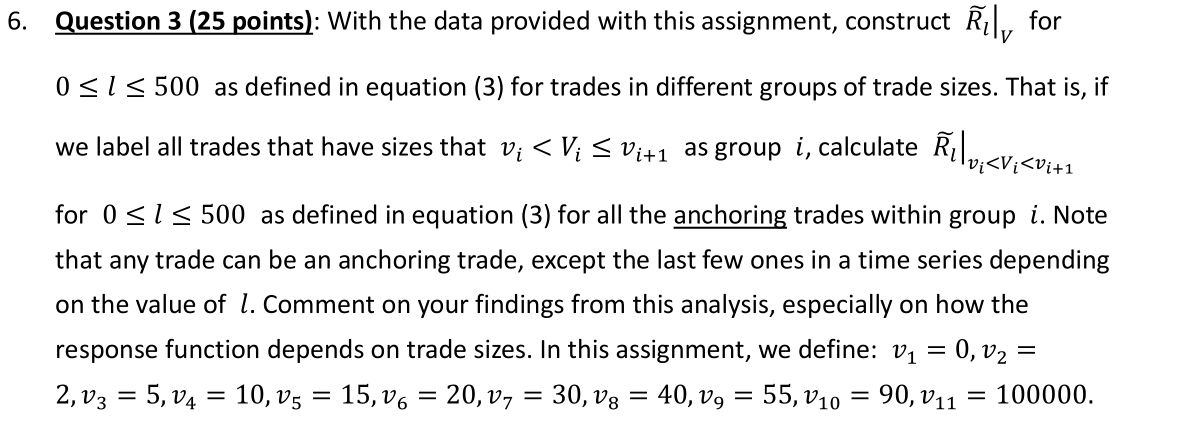

In [94]:
def calculate_average_Rl_tilde_by_size(df, max_l):
    # Define trade size categories
    size_categories = [0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 55.0, 90.0, 100000.0]
    #add 1 to each element in the list
    size_categories = [x+0.1 for x in size_categories]
    size_categories

    # Create a new column to represent trade size groups
    df['TradeSizeGroup'] = pd.cut(df['Size'], bins=size_categories, labels=False, right=False)

    average_Rl_tilde_results_by_size = {}

    for size_group in df['TradeSizeGroup'].unique():
        group_df = df[df['TradeSizeGroup'] == size_group]

        # Calculate Rl_tilde for each l in the range [0, max_l]
        Rl_tilde_results = [calculate_Rl_tilde(group_df, l) for l in range(max_l + 1)]

        # Save the results for each group as a dictionary entry
        average_Rl_tilde_results_by_size[size_group] = Rl_tilde_results

    return average_Rl_tilde_results_by_size

# Example usage:
max_l = 500
average_Rl_tilde_results_by_size = calculate_average_Rl_tilde_by_size(df, max_l)

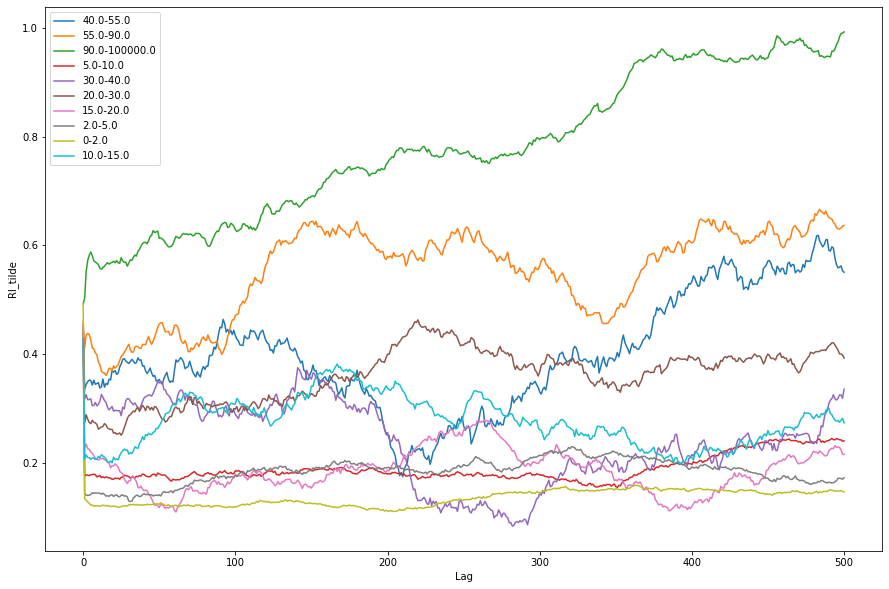

In [120]:
size_categories = [0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 55.0, 90.0, 100000.0]
create_bin_tags = [str(x) + '-' + str(y) for x, y in zip(size_categories[:-1], size_categories[1:])]
plt.figure(figsize=(15,10))
#plot the results for each bin in the same figure
for size_group in average_Rl_tilde_results_by_size:
    #if size_group is nan then skip
    if np.isnan(size_group):
        continue
    plt.plot(average_Rl_tilde_results_by_size[size_group], label=create_bin_tags[int(size_group)])

plt.xlabel('Lag')
plt.ylabel('Rl_tilde')
plt.legend()
plt.show()